# Exercise # 2 

Instructor for Assignment:
 - Saad Obaid ul Islam: saad.obaid-ul-islam@uni-wuerzburg.de
 - Kindly post your questions here: https://wuecampus.uni-wuerzburg.de/moodle/mod/forum/view.php?id=3093380 

In this exercise, you will learn about Neural Network optimization using loss functions and backpropagation algorithm. You will also complete the code for your own miniature reverse mode automatic differentiation framework.   

Note: Notation may not be the same as the lecture. In that case, kindly open an issue at the forum. DO NOT CHANGE THE CODE SKELETONS, JUST COMPLETE THE MISSING PARTS, as instructed.

Pre-requistes:
1. Python >= 3.8
2. [torch (PyTorch)](https://pytorch.org/get-started/locally/) -> PyTorch is a library for working with tensors on GPUs (or CPUs; you do not need a GPU for the exericses). This is **the** library for implementing and training deep learning models.
3. [Numpy](https://numpy.org/install/) -> Library for working with tensors. It is CPU-only.
4. [maplotlib](https://pypi.org/project/matplotlib/) -> Library for creating visualizations. You will not be using this library but it is important to install it.



## Loss and Optimization

A loss function, often called cost function, is a function that computes the difference between the ground truth and predicted output. In this exercise, you will learn about a simple loss function, known as Mean Squared Errors.
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2  
$$

Where:


1.   $n$ is the total number of data points.
2.   $y_i$ is the ground truth.
3.   $\hat{y}_i$ is the predicted output computed as $x_iθ^T$ where $x_i$ is the input and $\theta$ is the model parameter.

To understand the $MSE$ loss function, imagine fitting a line through multiple data points, the $MSE$ will calculate how close the line is to each data point.

 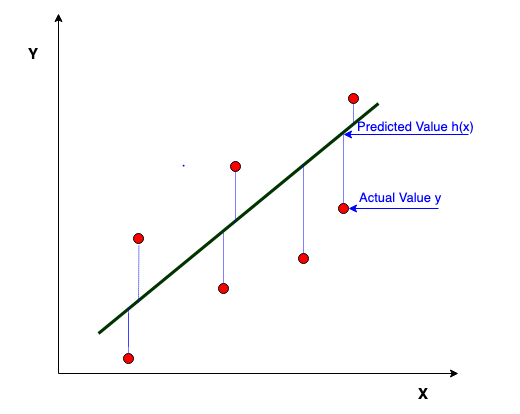


 The above loss/cost function is used in optimization algorithms like Gradient Descent.


---



 ## Gradient Descent

Gradient Descent (GD) is an optimization algorithm that minimizes the objective function (cost/loss function) $J(θ)$.

$\text{For each parameter } \theta, \text{ update:} \\
\theta_{new} := \theta_{old} - \eta \frac{\partial}{\partial \theta} J(\theta)$

Where:
1. $\theta_{old}$ is parameter before the update.
2. $\eta$ is the learning rate (step size).
3. $J(\theta)$ is the cost function (in our case, $MSE$ loss).
4. $\theta_{new}$ is the updated parameter.

Now, when we use $MSE$ loss in the gradient descent algorithm, the algorithm becomes.

$
\theta_{new} := \theta_{old} - \eta \frac{\partial}{\partial \theta} \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$

The partial derivative of MSE loss function is as follows considering $\hat{y}_i = \theta^T x_i$

$
    \frac{\partial L}{\partial \theta} = \frac{2}{n} \sum_{i=1}^{n} x_{ij} (y_i - \hat{y}_i)
$

Using the gradient, we can update each parameter $\theta_{new}$ in the model:

$
  \theta_{new} = \theta_{old} - \eta \cdot \frac{2}{n} \sum_{i=1}^{n} x_{ij} (y_i - \hat{y}_i)
$


---


You will now write code for the $MSE$ loss function and **gradient descent** algorithm using python **numpy** module. Use the comments and hints provided.




In [1]:
import numpy as np

In [2]:
def compute_cost(X, y, theta):

    # predictions = input * theta

    # cost = (1/n) * sum of ((predictions - y)^2)
    return np.mean(np.square(np.dot(X, theta) - y))

# Hint: Use the following
# np.sum(): https://numpy.org/doc/stable/reference/generated/numpy.sum.html
# np.square(): https://numpy.org/doc/stable/reference/generated/numpy.square.html

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    n = len(y)
    cost_history = np.zeros(iterations)

    # for each iteration

        # prediction = input . theta

        # errors = predictions - y

        # compute gradient of cost function: Δθ = (2*eta/n) * X.T * errors

        # update theta_new: θ = θ - Δθ
        # Store cost in history
    for i in range(iterations):
        predictions = np.dot(X, theta)
        errors = np.subtract(predictions, y)
        gradient = np.dot(X.T, errors) / n
        theta -= learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Hint:
# Use np.dot: https://numpy.org/doc/stable/reference/generated/numpy.dot.html
# Use np.subtract: https://numpy.org/doc/stable/reference/generated/numpy.subtract.html
# Use X.transpose(): https://numpy.org/doc/stable/reference/generated/numpy.transpose.html

In [3]:
# Example usage. Play around by adding more data points.
X = np.array([[1, 1, 4], [1, 2, 6], [1, 3, 8], [1,7, 9], [1,24,5]]) # data with three columns: two features and one bias for each data point
y = np.array([1, 2, 3, 4, 5])
theta_gd = np.zeros(3) # three parameters: two feature, and one bias.
iterations = 10
learning_rate = 0.01

theta_gd, cost_history = gradient_descent(X, y, theta_gd, learning_rate, iterations)
print("Theta:", theta_gd)
print("Final cost:", cost_history[-1])

Theta: [0.03496017 0.15017122 0.29256546]
Final cost: 0.05080231395721322


## Tests for Gradient Descent and MSE Loss

###<font color='red'>Students should **NOT** modify the test cell.</font>  

In [4]:
import unittest

class TestOptimizationFunctions(unittest.TestCase):
    def setUp(self):
        # Test data
        self.X = np.array([[1, 2, 4, 5, 8], [1, 3, 6, 8, 9], [1, 4, 5, 4, 2], [1, 5, 1, 6, 8]])
        self.y = np.array([7, 6, 5, 4])
        self.t = np.array([0.1, 0.2, 0.1, 0.3, 0.8])
        self.lr = 0.001
        self.iter = 1000

    def test_compute_cost(self):
        # Compute the cost with known values
        cc = compute_cost(self.X, self.y, self.t)
        ec = 14.2625
        self.assertAlmostEqual(cc, ec, places=4)


    def test_gradient_descent(self):
        # Run gradient descent to find optimized theta values
        theta, c_history = gradient_descent(self.X, self.y, self.t, self.lr, self.iter)
        t = np.round(theta,3)
        e_t = np.array([0.241, 0.221, 0.688, -0.19, 0.4])
        np.testing.assert_array_almost_equal(t, e_t, decimal=8)

        # Check that the cost history is decreasing
        for i in range(1, len(cost_history)):
            self.assertLessEqual(c_history[i], c_history[i - 1])

# Running the unit tests
if __name__ == '__main__':
    suite1 = unittest.TestLoader().loadTestsFromTestCase(TestOptimizationFunctions)
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite1)


test_compute_cost (__main__.TestOptimizationFunctions) ... ok
test_gradient_descent (__main__.TestOptimizationFunctions) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.071s

OK


## Stochastic Gradient Descent
Stochastic Gradient Descent (SGD) is a variant of the gradient descent algorithm. It uses only a single training example at a time to perform the updates. This approach speeds up the training process and used commonly.

$\text{For each training example } (x^{(i)}, y^{(i)}), \text{ and for each parameter } \theta, \text{ update:} \\
\theta := \theta - \eta \frac{\partial}{\partial \theta} J(\theta; x^{(i)}, y^{(i)})$


Do not worry. You will not be coding SGD, however, it is important to know how SGD is implemented.

MSE loss for a single training example is as follows:

$    
  J(\theta; x^{(i)}, y^{(i)}) = MSE_i = (y_i - \hat{y}_i)^2
$

The gradient of $MSE_i$ is computed as:

$
  \nabla_{\theta} MSE_i = -2 x_i (y_i - \hat{y}_i)
$

Substituting the gradient in parameter update rule for SGD:

$
  \theta_{new} = \theta_{old} + 2\eta x_i (y_i - \hat{y}_i)
$

You can compare the above equation for SGD with update rule for gradient descent: $\theta_{new} = \theta_{old} - \eta \cdot \frac{2}{n} \sum_{i=1}^{n} x_{ij} (y_i - \hat{y}_i)$. You can observe that there is no summation of $n$ training examples before the update. This way, SGD converges faster than GD.

## Backpropagation Algorithm

Backpropagation (backprop) is a fundamental algorithm that is used for training neural networks. It is an application of the chain rule from calculus to compute the gradient (or derivatives) of a loss function with respect to the weights of the network.


You have learned about backpropagation algorithm in detail in the lecture. Here you will first implement backpropagation algorithm by hand and then implement it in pytorch.

## Network Structure
- **Inputs:** $(x_1, x_2)$
- **Hidden Layer:** 2 neurons $(h_1, h_2$)
- **Output:** Single neuron $(o_1)$
- **Activation function:** Sigmoid for hidden and output layers
- **Loss Function:** MSE Loss

## Weights & Biases:
- **Weights from input to hidden layer:** $(w_{11}, w_{12}, w_{21}, w_{22})$
- **Biases of hidden layer:** $(b_1, b_2)$
- **Weights from hidden to output layer:** $(w_{o1}, w_{o2})$
- **Bias of output neuron:** $(b_o)$

## Given Values:
- **Input:** $(x_1 = 0.5, x_2 = 0.85)$
- **True output (target):** $(y = 0.75)$
- **Initial Weights:** $(w_{11} = 0.15, w_{12} = 0.25, w_{21} = 0.45, w_{22} = 0.35)$
- **Initial Biases:** $(b_1 = 0.2, b_2 = 0.3)$
- **Output Layer Weights:** $(w_{o1} = 0.6, w_{o2} = 0.4)$
- **Output Layer Bias:** $(b_o = 0.1)$

## Task:
1. **Feedforward Phase:** Compute the output $(o_1)$ of the neural network.
2. **Backpropagation Phase:** Update all weights and biases using the backpropagation algorithm assuming a learning rate $(\eta = 0.1)$.

The computations are given to help the students out.

### Step 1: Feedforward Phase
Calculate hidden neuron activations:
- For each hidden neuron $(h_i)$:
  - $z_i = w_{i1} \cdot x_1 + w_{i2} \cdot x_2 + b_i$
  - $h_i = \sigma(z_i)$ where $\sigma(z)$ is the sigmoid activation function $\sigma(z) = \frac{1}{1 + e^{-z}}$.

Calculate output neuron:
- $z_o = w_{o1} \cdot h_1 + w_{o2} \cdot h_2 + b_o$
- $o_1 = \sigma(z_o)$

### Step 2: Backpropagation Phase
Compute output error:
- Error (loss) derivative with respect to output:
  - $\frac{\partial E}{\partial o_1} = 2 \cdot (o_1 - y)$
- Derivative of the sigmoid function at the output:
  - $\frac{\partial o_1}{\partial z_o} = o_1 \cdot (1 - o_1)$
- Error (loss) with respect to $z_o$:
  - $\delta_o = \frac{\partial E}{\partial o_1} \cdot \frac{\partial o_1}{\partial z_o}$

Update weights and biases from hidden to output:
- $w_{oi} \leftarrow w_{oi} - \eta \cdot \delta_o \cdot h_i$
- $b_o \leftarrow b_o - \eta \cdot \delta_o$


Backpropagate error to hidden layer:
- For each hidden neuron $i$:
  - $\delta_i = \delta_o \cdot w_{oi} \cdot h_i \cdot (1 - h_i)$

Update weights and biases from input to hidden:
- $w_{ij} \leftarrow w_{ij} - \eta \cdot \delta_i \cdot x_j$
- $b_i \leftarrow b_i - \eta \cdot \delta_i$

## Provide Answers:
For each of the above computation, students need to perform only 1 iteration. After 1 iteration. Output the following values:

1. 
$$
\begin{align*}
h &= \begin{bmatrix}
0.6195 \\
0.6948
\end{bmatrix}
\end{align*}
$$

2. $o_1$  = 0.6791
3. $w_{o1}$  = 0.601
4. $w_{o2}$ = 0.4011
5. $b_o$ = 0.1015
6. $\delta_{h1}$ = -0.0093
7. $\delta_{h2}$ = -0.0062

# Building our own **reverse mode autodiff** 

In this exercise you will create your own rudimentary reverse mode automatic differentiation framework. For simplicity, our toy autodiff will work only with scalar parameters and result of each operation will also be a scalar. 

Our simple framework will only support the basic binary arithmetic operations -- addition, subtraction, multiplication, and division -- plus two unary operations exponentiation (e^x) and logarithm (log x).

The skeleton of the framework operates on the notion of the **computation graph** which consist of **nodes**, implemented with the class **Node** below. The class consist of the following methods and properties:

* Properties
 - *name* (string): name of the node (parameter or intermediate result of the computation graph)
 - *init_val* (float): initial value for the parameter (only for nodes that are input parameters)
 - *is_param* (bool): indicate if the node represents a trainable parameter (value is True) or an intermediate computation result (value is False)
 - *grad* (float): the value of the **adjoint** of the node (see the slides from Lecture 3). If the node is a parameter, then the value is the actual partial derivative of the objective function w.r.t. that parameter. 
 - *parent1* (Node) and parent2 (Node): parent nodes of the node. Since we're supporting only unary and binary operations, then each node is the result of the operation on one or two other nodes. If unary operation, then self.parent2 is None. If the node is a trainable input parameter, then both parent nodes will be None (i.-e., input parameters have no parents in the computation graph) 
 - *children* (list of Nodes): all nodes created with this node as a parent
 - *done*  (bool): indicates if the computation of the adjoint of the node is completed (i.e., contributions of all children nodes have been aggregated) 
 
* Methods
  - constructor (*__init__*): initializes the new Node when created -- if the init_val is not provided and is_param is True (i.e., the Node is a trainable parameter), the value will be randomly initialized.
  - *backward*: key function that propagates the computation of **adjoints** from the current node to the parent node. It is a recursive implementation of the reverse pass through the computation graph, starting from the objective (the Node on which backward() is called)
  - *is_done*: checks if the computation of the adjoint of the node is completed, i.e., if all children *nodes* are labeled as done, and if so, marks this node as *done* too 



In [5]:
import random
import typing
import numpy as np

# single node in the computation graph, either parameter or intermediate result
class Node:
    def __init__(self, name: str, init_val : float = None, is_param : bool = False):
        self.name = name
        if init_val:
            self.value = init_val
        elif is_param:
            self.value = random.random()
        
        self.grad = None
        self.done = False
        
        self.parent1 = None
        self.parent2 = None
        self.children = []
        
    def backward(self, target_func = False):
        print(self.name)
        if target_func:
            self.grad = 1
            self.done = True
        
        # initializing parent node's adjoint to 0 if current node is its first child processed (in reverse)
        if self.parent1:
            if not self.parent1.grad:
                self.parent1.grad = 0
            self.parent1.grad += self.grad * self.back_first

        # false for unary operators
        if self.parent2: 
            # initializing parent node's adjoint to 0 if current node is its first child processed (in reverse)
            if not self.parent2.grad:
                self.parent2.grad = 0
            self.parent2.grad += self.grad * self.back_second
        
        if self.parent1 and self.parent1.is_done():
            self.parent1.backward(target_func = False)
        
        if self.parent2 and self.parent2.is_done():
            self.parent2.backward(target_func = False)
        
        
    # indicates if the adjoint for the node can be computed, that is, 
    # if the adjoints of all children have been computed    
    def is_done(self):
        for c in self.children:
            if not c.done:
                return False
        else:
            self.done = True
            return True

**Task #1**: Complete the two incomplete lines of code above in the *backward* method of the **Node** class, those where the adjoint of the parents should be augmented with the contribution from the child (i.e., current node).  

```python
self.parent1.grad += ...

...

self.parent2.grad += ...
```


We next need to define the supported **operations** and in particular: 
- *forward* function: How the value of a child node is computed from the value of the parent node(s) for each particular operation
- *back_first*: How the derivative of the child node variable per *first parent* node variable is computed
- *back_second*: How the derivative of the child node variable per *second parent* node variable is computed. If the child node is computed from only one parent via an unary operation, than back_second is undefined. 

We first define the abstract class **Operation**, which will take care of all the "code" common to all operations (creation of the new node from parent(s)) except the exact computation of *forward*, *back_first* and *back_second*, which will have to be implemented in each class that inherits from Operation. 

In the constructor of the **Operation**, the new child node is created from one or two input nodes (parent nodes). The actual "semantics" of the Operation, that is, (1) how the value of the child node is to be computed from the value(s) of the parent node(s) -- function *forward()* and (2) how the adjoint of the child node is to contribute to the adjoint of the parent node(s) (i.e., the derivative of the child per parent) are to be implemented in classes that inherit from the class Operation and represent concrete operations: 

- Add: value of the child node is the sum of values of parent nodes
- Sub: value of the child node is the value of the second parent subtracted from the value of the first parent
- Mul: value of the child node is the product of values of parent nodes
- Div: value of the child node is the values of the first parent node divided with the value of the second parent node
- Exp: value of the child is e to the power of the value of the parent node
- Log: value of the child is the natural logarithm of the value of the parent node

In [6]:
class Operation:
    def __init__(self, input1: Node, input2: Node = None, name: str = None):
        self.input1 = input1
        self.input2 = input2
        
        self.output = Node(name = name, is_param = False)
        
        self.output.value = self.forward()
        print(self.output.name + " " + str(self.output.value))
        
        self.input1.children.append(self.output)
        self.output.parent1 = input1
        
        self.output.back_first = self.back_first()
        
        if self.input2:
            self.input2.children.append(self.output)
            self.output.parent2 = input2
            
            self.output.back_second = self.back_second()
    
    # specifies how the output of the operation is computed from the inputs
    def forward(self):  
        raise NotImplementedError("Abstract function. Implement in the child class")
    
    # specifies how the partial derivative of output per first input is computed
    def back_first(self):
        raise NotImplementedError("Abstract function. Implement in the child class")    
    
    def back_second(self):
        raise NotImplementedError("Abstract function. Implement in the child class")    


**Task #2**: Implement the **forward**, **back_first**, and (for binary operators) **back_second** function for the six listed basic operations. 

In [7]:
import math

class Add(Operation):
    def __init__(self, input1: Node, input2: Node = None, name: str = None):
        super(Add, self).__init__(input1, input2, name)
    
    def forward(self):
        return self.input1.value + self.input2.value
    
    def back_first(self):
        return 1
    
    def back_second(self):
        return 1

class Sub(Operation):
    def __init__(self, input1: Node, input2: Node = None, name: str = None):
        super(Sub, self).__init__(input1, input2, name)
    
    def forward(self):
        return self.input1.value - self.input2.value
    
    def back_first(self):
        return 1
    
    def back_second(self):
        return -1    

class Div(Operation):
    def __init__(self, input1: Node, input2: Node = None, name: str = None):
        super(Div, self).__init__(input1, input2, name)
    
    def forward(self):
        return self.input1.value / self.input2.value
    
    def back_first(self):
        return 1 / self.input2.value
    
    def back_second(self):
        return -self.input1.value / (self.input2.value ** 2)
    
    
class Mul(Operation):
    def __init__(self, input1: Node, input2: Node = None, name: str = None):
        super(Mul, self).__init__(input1, input2, name)
    
    def forward(self):
        return self.input1.value * self.input2.value
    
    def back_first(self):
        return self.input2.value
    
    def back_second(self):
        return self.input1.value

class Exp(Operation):
    def __init__(self, input1: Node, input2: Node = None, name: str = None):
        super(Exp, self).__init__(input1, input2, name)
    
    def forward(self):
        return math.exp(self.input1.value)
    
    def back_first(self):
        return math.exp(self.input1.value)
        
class Log(Operation):
    def __init__(self, input1: Node, input2: Node = None, name: str = None):
        super(Log, self).__init__(input1, input2, name)
    
    def forward(self):
        return math.log(self.input1.value)
    
    def back_first(self):
        return math.log(self.input1.value)
    

**Task #3**: Your next task is now to use the above operations to create a computation graph for the following function: 

$$ f(x_1, x_2) = (\frac{x_1}{x_2} + e^{\frac{x_1}{x_2}})\cdot(\frac{x_1}{x_2} - \mathit{ln}\,{x_2}) $$

Yes, it's the same function from the lecture slides, so that you can easily check the results (values and adjoints) :)). Note: the result (i.e, child node) of the operation is obtainable through the *.output* property of the corresponding Operation object. 

The computation graph you should create is the following: 

- $$ a = \frac{x_1}{x_2} $$
- $$ b = e^{a} $$
- $$ c = a + b $$
- $$ d = \mathit{ln}\,x_2 $$
- $$ e = a - d $$
- $$ f = c \cdot e $$

In [8]:
x1 = Node(name="x1", init_val = 0.5, is_param = True)
x2 = Node(name="x2", init_val = 1.0, is_param = True)

a = Div(x1, x2, "a").output
b = Exp(a, name = "b").output
c = Add(b, x1, "c").output
d = Log(c, name = "d").output
e = Sub(a, d, "e").output
f = Mul(c, e, name="f").output


a 0.5
b 1.6487212707001282
c 2.148721270700128
d 0.7648729073870885
e -0.26487290738708846
f -0.5691380501348221


Finally, we will call the reverse mode pass of the autodiff, by invoking the backward function on the final node of our computation graph, stored in the variable *f* (representing the whole function *f*). The recursive backward function will print out the names of the nodes in the order in which they are visited in the reverse/backward pass through the computation graph.  

In [9]:
f.backward(target_func = True)

f
e
d
c
b
a
x1
x2
x1


After running the backward/reverse pass, we can check the values of the gradient of f per our input variables $$x_1$$ and $$x_2$$

In [10]:
print(x1.grad)
print(x2.grad)

-2.9060231597397554
0.4988257834338905


## Implementation in Pytorch

Now you will implement backpropgation algorithm using [pytorch autograd module](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) on a neural network which we will construct using [pytorch.nn](https://pytorch.org/docs/stable/nn.html).

Kindly read the documentation for a detailed overview. Helpful functions for the exercise are provided below.

Important functions in the pytorch library:

1. **torch.nn.Module**: The base class for all neural network modules. Your custom models should also subclass this class. Models are defined by subclassing nn.Module and defining a forward method.

2. **torch.nn.Linear(input_size, hidden_size)**: It's used to define the layers of the neural network. The input_size and hidden_size parameters specify the size of each input and output, respectively

3. **torch.nn.ReLU()**: Applies the rectified linear unit function element-wise. It's used as the activation function between layers to introduce non-linearity.

4. torch.nn.Sigmoid(): Applies the sigmoid function element-wise. It's used here in the output layer to squash the output to a range between 0 and 1, suitable for binary classification.

5. **torch.nn.BCELoss()**: Commonly used binary cross entropy objective function. It's used as the loss function for training a classifier.

6. **torch.optim.SGD(model.parameters(), lr=learning_rate)**:  Implements stochastic gradient descent (SGD) optimization. It updates the model's weights using the gradients computed during backpropagation. The lr parameter specifies the learning rate.

Important function in the pytorch autograd:

1. **with torch.no_grad()**: A context manager that disables gradient calculation, making code run faster and reducing memory usage. It's used here during the evaluation phase where we don't need gradients.

2. **loss.backward()**: Computes the gradient of the loss with respect to all tensors. After calling this function, all tensors in the computation graph will have their **.grad** tensor populated with the gradients.

3. **optimizer.zero_grad()**: Clears the gradients of all optimized tensors. This is necessary because by default, gradients accumulate in buffers whenever .backward() is called.

4. **optimizer.step()**: Performs a single optimization step (parameter update).

In [11]:
#import the necessary modules
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

## Implement the following functions:
1. **forward()**
2. **train()**
3. **Variables in main**


In [12]:
class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyNeuralNetwork, self).__init__()
        # Implement layers
        # Neural Network Architecture:
        # Input layer --> Linear --> ReLU --> Linear --> Sigmoid --> Output layer
        #
        # To add layers:
        # Simply add self.fcX = nn.Linear(previous_layer_size, new_layer_size) lines
        # and apply activations between them as needed in the forward function.

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Forward pass
        # Feed the input x in the first fully connected layer, and then into non linear layer, and so on.
        #At the end, use sigmoid activation function.
        # x = self.fc1(x)
        # x = self.relu(x)

        return self.sigmoid(self.fc2(self.relu(self.fc1(x))))

def train(model, criterion, optimizer, X_train, y_train, epochs=100):
    loss_history = []

    model.train()
    # for each training epoch
    for epoch in range(epochs):
        optimizer.zero_grad()
        # Forward pass: Compute predicted y by passing x to the model
        y = model(X_train).squeeze()
        # Compute and save loss history
        loss = criterion(y, y_train)
        loss_history.append(loss.item())
        loss.backward()
        optimizer.step()

        # Zero gradients


        #perform a backward pass.


        #update the weights


        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    # return loss history
    return loss_history


Here you will also compute **accuracy metric**.

Accuracy = $\frac{Number\;of\;correct\;predictions}{Number\;of\;total\;predictions}$

In [30]:
def compute_accuracy(model, X, y):
  # Compute Accuracy Metric.
  # Use torch.no_grad()
  # Get model predictions
  # Get total number of predictions
  # Get the total number of correct predictions
  # compute accuracy. multiply by 100 to get percentage.
  with torch.no_grad():
      model.eval()
      predictions = model(X).squeeze()
      total = y.shape[0]
      correct = (predictions > 0.5) == y
      accuracy = correct.sum().item() / total * 100
  return accuracy

Epoch [10/100], Loss: 0.6791
Epoch [20/100], Loss: 0.6751
Epoch [30/100], Loss: 0.6712
Epoch [40/100], Loss: 0.6672
Epoch [50/100], Loss: 0.6633
Epoch [60/100], Loss: 0.6594
Epoch [70/100], Loss: 0.6555
Epoch [80/100], Loss: 0.6516
Epoch [90/100], Loss: 0.6477
Epoch [100/100], Loss: 0.6438


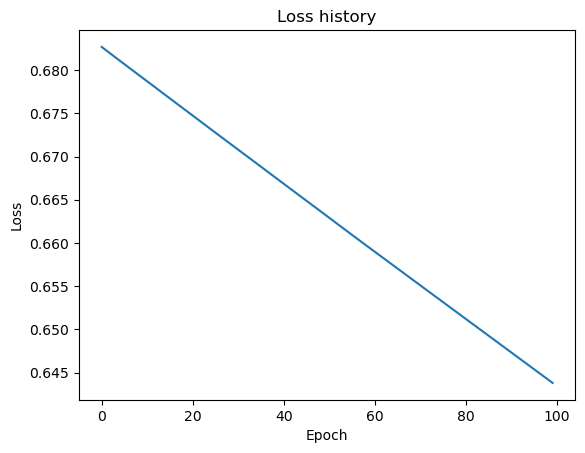

Accuracy: 70.0%


In [31]:
# Dummy dataset generation
def generate_dummy_data(num_samples=100, input_size=10):
    X = torch.randn(num_samples, input_size)
    y = (torch.sum(X, dim=1) > 0).float()  # Simple classification task based on the sum of features
    return X, y

# Main function

# TODO: declare model, criterion, and optimizer variables.
if __name__ == '__main__':
    input_size = 10
    hidden_size = 8
    output_size = 1
    learning_rate = 0.01
    epochs = 100

    X, y = generate_dummy_data()

    #Create your model by calling the class MyNeuralNetwork
    model = MyNeuralNetwork(input_size, hidden_size, output_size)
    # Use binary cross entropy as your cost function
    criterion = torch.nn.BCELoss()
    # Use stochastic gradient descent as your optimizer.
    # Make sure to pass model.parameter() and the learning rate to optimizer.
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Training loop
    loss_history = train(model, criterion, optimizer, X, y, epochs)

    # Plotting loss history
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss history')
    plt.show()

    # Compute and print accuracy
    accuracy = compute_accuracy(model, X, y)
    print(f'Accuracy: {accuracy}%')

## Tests for Backprop

###<font color='red'>Students should **NOT** modify the test cell.</font>

In [32]:
import unittest

class TestNeuralNetwork(unittest.TestCase):
    def setUp(self):
        self.input_size = 10
        self.hidden_size = 15
        self.output_size = 1
        self.model = MyNeuralNetwork(self.input_size, self.hidden_size, self.output_size)

    def test_initialization(self):
        # Check if the model is correctly initialized with the expected layers
        self.assertIsInstance(self.model.fc1, nn.Linear)
        self.assertIsInstance(self.model.fc2, nn.Linear)
        self.assertEqual(self.model.fc1.in_features, self.input_size)
        self.assertEqual(self.model.fc1.out_features, self.hidden_size)
        self.assertEqual(self.model.fc2.in_features, self.hidden_size)
        self.assertEqual(self.model.fc2.out_features, self.output_size)

    def test_forward(self):
        # Check the forward pass
        x = torch.randn(5, self.input_size)
        output = self.model(x)
        self.assertEqual(output.shape, (5, self.output_size))
        # Ensure output is in the range [0, 1]
        self.assertTrue(torch.all(output >= 0) and torch.all(output <= 1))

    def test_train_function(self):
        # Set up for training test
        c = nn.BCELoss()
        opt = optim.SGD(self.model.parameters(), lr=0.01)
        X_train, y_train = generate_dummy_data(num_samples=100, input_size=self.input_size)

        # Test the train function
        loss_history = train(self.model, c, opt, X_train, y_train, epochs=10)
        self.assertIsInstance(loss_history, list)
        self.assertEqual(len(loss_history), 10)
        # Ensure the loss is decreasing
        self.assertTrue(all(loss_history[i] >= loss_history[i + 1] for i in range(len(loss_history) - 1)))

    def test_accuracy_computation(self):
        # Generate test data
        X_test, y_test = generate_dummy_data(num_samples=100, input_size=self.input_size)

        # Ensure the model has some predictions
        self.model.eval()  # set the model to evaluation mode
        accuracy = compute_accuracy(self.model, X_test, y_test)
        self.assertIsInstance(accuracy, float)
        self.assertTrue(0 <= accuracy <= 100)

# Running the unit tests
if __name__ == '__main__':
    suite2 = unittest.TestLoader().loadTestsFromTestCase(TestNeuralNetwork)
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite2)


test_accuracy_computation (__main__.TestNeuralNetwork) ... ok
test_forward (__main__.TestNeuralNetwork) ... ok
test_initialization (__main__.TestNeuralNetwork) ... ok
test_train_function (__main__.TestNeuralNetwork) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.012s

OK


Epoch [10/10], Loss: 0.6587
